In [804]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [805]:
'''Importing the PreProcessing Libraries'''

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler
    
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import the Data

Import the data found in `datasets/inventory_by_county.csv`. This data comes from [realtor.com](https://research.realtor.com/data/inventory-trends/) and details housing information about the most active counties for housing stock in the US. 

After you import the data and run the following cell to create a "state" identifier: 
- take out the `Median Listing Price` as your target column.
- use `train_test_split()` with a test size of `0.33` to create a training and test set for the features and your target column (`Median Listing Price`). You should have four objects at this point.
- identify the number of rows and columns in all four of datasets (`train_x, train_y, test_x, test_y`)

In [806]:
df = pd.read_csv('datasets/inventory_by_county.csv')

# The last line of the csv contains extra information for the reader but not valid data
# We will remove that line and use the .copy() method
# To create a copy of the DataFrame itself
# Instead of referring to a slice or a mask of the original dataframe

df = df.iloc[0:1000, :].copy()
df.head()

,Month,CountyFIPS,CountyName,Nielsen Rank,Footnote,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,...,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
0,2017-09-01,6037.0,"Los Angeles, CA",1.0,NaN,649900.0,-0.0002,0.0398,16464.0,-0.0261,...,-0.2008,1377900.0,-0.0035,0.1149,19577.0,-0.0306,-0.1578,0.1891,-0.0055,-0.0122
1,2017-09-01,17031.0,"Cook, IL",2.0,NaN,277000.0,-0.0072,0.0897,26510.0,-0.0142,...,-0.2012,428900.0,-0.0046,0.0701,29420.0,-0.0202,-0.0683,0.1098,-0.0067,-0.0207
2,2017-09-01,48201.0,"Harris, TX",3.0,NaN,299000.0,0.0007,-0.0355,15472.0,-0.1020,...,-0.0535,446900.0,0.0182,-0.0225,21676.0,-0.0888,0.0114,0.4010,0.0204,-0.0397
3,2017-09-01,4013.0,"Maricopa, AZ",4.0,NaN,329500.0,0.0015,0.0444,18421.0,0.0013,...,-0.2857,515200.0,0.0043,0.0658,18426.0,0.0013,-0.0860,0.0003,0.0000,-0.0001
4,2017-09-01,6073.0,"San Diego, CA",5.0,NaN,660200.0,-0.0139,0.0541,6057.0,-0.0205,...,0.1176,1147100.0,-0.0126,0.0615,6076.0,-0.0224,-0.1880,0.0031,-0.0019,0.0009


In [807]:
df.describe()

,CountyFIPS,Nielsen Rank,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,Active Listing Count Y/Y,Days on Market,Days on Market M/M,...,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,788.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,30431.709000,500.500000,2.622020e+05,-0.000616,0.080983,1292.680000,-0.008401,-0.080988,72.650000,0.058960,...,10.089357,3.612006e+05,0.000967,0.068558,1520.065000,-0.010671,-0.064540,0.159675,-0.004647,0.024149
std,15399.453847,288.819436,1.593828e+05,0.023421,0.090276,1947.774955,0.042560,0.149425,21.816908,0.073884,...,77.051395,3.040102e+05,0.029171,0.083435,2331.792788,0.054097,0.153854,0.217957,0.057351,0.141385
min,1001.000000,1.000000,6.900000e+04,-0.093500,-0.164200,97.000000,-0.323300,-0.540700,23.000000,-0.394700,...,-1.000000,1.006000e+05,-0.364300,-0.325800,100.000000,-0.224400,-0.519600,0.000000,-0.335500,-0.611400
25%,18004.500000,250.750000,1.649750e+05,-0.012625,0.026300,404.250000,-0.031125,-0.170875,57.000000,0.015675,...,-0.333300,2.129500e+05,-0.010025,0.020625,448.250000,-0.035950,-0.149025,0.001300,-0.011700,-0.005325
50%,34006.000000,500.500000,2.268500e+05,0.000000,0.068300,705.000000,-0.011550,-0.099000,70.000000,0.059700,...,-0.046000,2.871500e+05,0.000800,0.061450,814.500000,-0.016750,-0.087050,0.052100,-0.000300,0.000200
75%,42082.000000,750.250000,3.090000e+05,0.010100,0.122450,1441.500000,0.011725,-0.002075,87.000000,0.103400,...,0.213400,3.960750e+05,0.011325,0.110725,1654.000000,0.005025,0.004225,0.257150,0.000600,0.035125
max,56025.000000,1000.000000,2.127500e+06,0.148300,1.061800,26510.000000,0.344700,0.784900,188.000000,0.347800,...,1281.000000,4.379100e+06,0.257400,0.738300,29420.000000,0.500000,0.937500,1.705900,0.510200,1.117400


In [808]:
new_df = df.loc[:,'Nielsen Rank': 'Pending Ratio Y/Y'].copy()
del new_df['Footnote']
new_df.columns

Index(['Nielsen Rank', 'Median Listing Price', 'Median Listing Price M/M',
       'Median Listing Price Y/Y', 'Active Listing Count ',
       'Active Listing Count M/M', 'Active Listing Count Y/Y',
       'Days on Market ', 'Days on Market M/M', 'Days on Market Y/Y',
       'New Listing Count ', 'New Listing Count M/M', 'New Listing Count Y/Y',
       'Price Increase Count ', 'Price Increase Count M/M',
       'Price Increase Count Y/Y', 'Price Decrease Count ',
       'Price Decrease Count M/M', 'Price Decrease Count Y/Y',
       'Pending Listing Count ', 'Pending Listing Count M/M',
       'Pending Listing Count Y/Y', 'Avg Listing Price',
       'Avg Listing Price M/M', 'Avg Listing Price Y/Y', 'Total Listing Count',
       'Total Listing Count M/M', 'Total Listing Count Y/Y', 'Pending Ratio',
       'Pending Ratio M/M', 'Pending Ratio Y/Y'],
      dtype='object')

In [809]:
# continue here to extract Median Listing Price and to split the data using train_test_split()

In [810]:
'''Setting up the target variable as the Median Listing Price '''
y = new_df[['Median Listing Price']]

In [811]:
count_columns_list = []
columns = list(new_df.columns) 
for col in columns: 
    count_columns_list.append(col)
print (count_columns_list)
    

['Nielsen Rank', 'Median Listing Price', 'Median Listing Price M/M', 'Median Listing Price Y/Y', 'Active Listing Count ', 'Active Listing Count M/M', 'Active Listing Count Y/Y', 'Days on Market ', 'Days on Market M/M', 'Days on Market Y/Y', 'New Listing Count ', 'New Listing Count M/M', 'New Listing Count Y/Y', 'Price Increase Count ', 'Price Increase Count M/M', 'Price Increase Count Y/Y', 'Price Decrease Count ', 'Price Decrease Count M/M', 'Price Decrease Count Y/Y', 'Pending Listing Count ', 'Pending Listing Count M/M', 'Pending Listing Count Y/Y', 'Avg Listing Price', 'Avg Listing Price M/M', 'Avg Listing Price Y/Y', 'Total Listing Count', 'Total Listing Count M/M', 'Total Listing Count Y/Y', 'Pending Ratio', 'Pending Ratio M/M', 'Pending Ratio Y/Y']


In [812]:
x = new_df[count_columns_list].copy()

In [813]:
'''Reviewing the X Dataframe'''
x.head()

,Nielsen Rank,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,Active Listing Count Y/Y,Days on Market,Days on Market M/M,Days on Market Y/Y,...,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
0,1.0,649900.0,-0.0002,0.0398,16464.0,-0.0261,-0.1491,41.0,0.0250,-0.1458,...,-0.2008,1377900.0,-0.0035,0.1149,19577.0,-0.0306,-0.1578,0.1891,-0.0055,-0.0122
1,2.0,277000.0,-0.0072,0.0897,26510.0,-0.0142,-0.0509,51.0,0.0408,-0.1356,...,-0.2012,428900.0,-0.0046,0.0701,29420.0,-0.0202,-0.0683,0.1098,-0.0067,-0.0207
2,3.0,299000.0,0.0007,-0.0355,15472.0,-0.1020,0.0401,61.0,0.1731,0.0702,...,-0.0535,446900.0,0.0182,-0.0225,21676.0,-0.0888,0.0114,0.4010,0.0204,-0.0397
3,4.0,329500.0,0.0015,0.0444,18421.0,0.0013,-0.0859,49.0,-0.0392,-0.0755,...,-0.2857,515200.0,0.0043,0.0658,18426.0,0.0013,-0.0860,0.0003,0.0000,-0.0001
4,5.0,660200.0,-0.0139,0.0541,6057.0,-0.0205,-0.1887,39.0,0.0263,-0.1333,...,0.1176,1147100.0,-0.0126,0.0615,6076.0,-0.0224,-0.1880,0.0031,-0.0019,0.0009


In [814]:
'''Reviewing the Y Dataframe'''
y.head()

,Median Listing Price
0,649900.0
1,277000.0
2,299000.0
3,329500.0
4,660200.0


In [815]:
'''Implementing the Test Train Approach with the Independent Variables and the Dependent Variables'''
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

print ('Shape of X Train: ', x_train.shape)
print ('Shape of Y Train: ', y_train.shape)
print ('Shape of X Test: ', x_test.shape)
print ('Shape of Y Test: ', y_test.shape)

Shape of X Train:  (670, 31)
Shape of Y Train:  (670, 1)
Shape of X Test:  (330, 31)
Shape of Y Test:  (330, 1)


# Question 1

Investigate the pattern of missing values in the dataset. What do you think should be done with those missing values? Is it appropriate to use `Imputer` to address any missing rows? Why or why not?

In [816]:
df.isnull().sum()[df.isnull().sum()>0]

Footnote                     862
Price Increase Count M/M     181
Price Increase Count Y/Y     188
Pending Listing Count M/M    198
Pending Listing Count Y/Y    212
dtype: int64

The below columns have null values in them 
1. Footnote
2. Price Increase Count M/M
3. Price Increase Count Y/Y
4. Pending Listing Count M/M
5. Pending Listing Count Y/Y

Based on quickly looking at the Footnote column, the non nul values have a *. Hence it makes sense to just ignore the column for the purposes of our analysis. 

The remaining columns can be imputed and we could replace the NAN columns by the imputed mean value 

# Question 2

Use the `Active Listing Count ` feature and the `Binarizer` preprocessing object to create a dummy variable coded 1 if the count of active listings is above 10,000 units. Store the transformed data from the training set in a variable called `training_active_listing_dummy`

In [817]:
active_listing_count_bin = Binarizer(10000)
active_listing_count_bin.fit(x_train['Active Listing Count '].values.reshape(-1,1))
training_active_listing_dummy = active_listing_count_bin.transform(x_train['Active Listing Count '].values.reshape(-1,1))

In [818]:
print ('First Five Rows in the Training Data:\n',training_active_listing_dummy[0:5])

First Five Rows in the Training Data:
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [819]:
print ('Binarized Mean: \n',training_active_listing_dummy.mean())

Binarized Mean: 
 0.0089552238806


# Question 3

The Pending Ratio of a county is the proportion of houses that are under contract to be sold, but have not been finalized yet. Your boss believes that the best way to model this is by including both the ratio and the $\text{ratio}^2$ -- this would let us investigate a non-linear relationship. 

Use `PolynomialFeatures` to create a pending ratio and a $\text{pending ratio}^2$ term. Do not include an intercept term. Save this 2-dimensional array in a variable called `training_pending_ratio`

In [820]:
'''Performing Polynomial Features on the Pending Ratio Column'''
polynomial_features = PolynomialFeatures(2, include_bias=False)
polynomial_features.fit(x_train['Pending Ratio'].values.reshape(-1,1))
training_pending_ratio = polynomial_features.transform(x_train['Pending Ratio'].values.reshape(-1,1))

In [821]:
print ('First Five Rows in the Training Data:\n\n',training_pending_ratio[0:5])

First Five Rows in the Training Data:

 [[  1.60000000e-03   2.56000000e-06]
 [  0.00000000e+00   0.00000000e+00]
 [  1.26400000e-01   1.59769600e-02]
 [  1.73100000e-01   2.99636100e-02]
 [  3.00000000e-04   9.00000000e-08]]


In [822]:
print ('Polynomial Mean:\n\n',training_pending_ratio.mean())

Polynomial Mean:

 0.118494485134


## Plotting Pending Ratios with its associated Polynomial Values

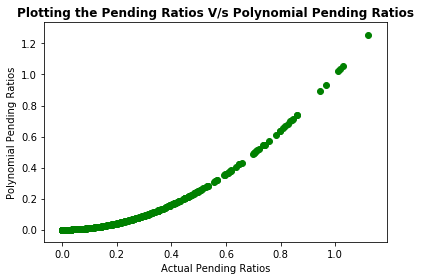

In [823]:
plt.scatter(training_pending_ratio[:,0], training_pending_ratio[:,1], color ='g')
plt.xlabel('Actual Pending Ratios')
plt.ylabel('Polynomial Pending Ratios')
plt.title('Plotting the Pending Ratios V/s Polynomial Pending Ratios', fontweight = 'bold')
plt.tight_layout()

# Question 4

Join the variables you have transformed in numpy. They should be the following:

- `training_active_listing_dummy`
- `training_pending_ratio`

What is the shape of the new numpy array?

In [824]:
print ('training_active_listing_dummy - Shape: ', training_active_listing_dummy.shape)

training_active_listing_dummy - Shape:  (670, 1)


In [825]:
print ('training_pending_ratio: ', training_pending_ratio.shape)

training_pending_ratio:  (670, 2)


### Joining the two variables

In [826]:
combined_array = np.concatenate([training_active_listing_dummy, training_pending_ratio],axis=1)
print ('Shape of the Combined Array: \n', combined_array.shape)

Shape of the Combined Array: 
 (670, 3)


# Question 5

Instantiate a `LinearRegression` object and fit a model using the new training array above and the training target column you created when you imported the data. What is the $R^2$ score using the training data?

In [827]:
x1 = combined_array
type(x1)

numpy.ndarray

In [828]:
combined_array

array([[  0.00000000e+00,   1.60000000e-03,   2.56000000e-06],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.26400000e-01,   1.59769600e-02],
       ..., 
       [  0.00000000e+00,   3.06000000e-02,   9.36360000e-04],
       [  0.00000000e+00,   4.03300000e-01,   1.62650890e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [829]:
'''Linear Regression'''
lr = LinearRegression()
model= lr.fit(x1, y_train)

In [830]:
'''Validating the Score with the training set'''
print ('Model Score Using the Training Data:\n',model.score(x1, y_train))

Model Score Using the Training Data:
 0.0532821363375


# Question 6

Using the fit objects that you created in questions 2, 3, and 4, do the following:

1. Transform the holdout (test) data that you created when you imported the data
2. Use numpy to join the transformed holdout (test) data. 
3. Score your fit `LinearRegression` object using the new holdout data. What happens to your $R^2$ value?

In [831]:
'''Transforming the Test Active Listing Count'''

transformed_test_active_listing = \
active_listing_count_bin.transform(x_test['Active Listing Count '].values.reshape(-1,1))

In [832]:
'''Performing Polynomial Features on the Pending Ratio Column'''

transformed_test_pending_ratio = \
polynomial_features.transform(x_test['Pending Ratio'].values.reshape(-1,1))

In [833]:
'''Combined Transformed Array'''

combined_transformed_array = \
np.concatenate([transformed_test_active_listing, transformed_test_pending_ratio],axis=1)

print ('Shape of the Combined Array: \n', combined_transformed_array.shape)

Shape of the Combined Array: 
 (330, 3)


In [834]:
'''Evaluating the model with the Test (Hold Out) Data'''
model.score(combined_transformed_array, y_test)

0.090830038637353838

# Bonus: Question 7

This question will require external research!

Import `StandardScaler` and answer the following questions:

1. Scale the training data and refit the linear regression. Does your $R^2$ change? Why or why not?
2. Compare the coefficients in your linear regression between the standardized and the unstandardized versions. What is the difference? How do you interpret the coefficients in each case?
3. Standardize your test data and look at the $R^2$ score between the standardized and unstandardized versions of your model. Is there a difference? Why or why not?

####  Scale the training data and refit the linear regression. Does your  R2R2  change? Why or why not?

In [835]:
ss_scaler = StandardScaler()

In [836]:
active_list_pending_ratio = x_train[['Active Listing Count ', 'Pending Ratio']].values
ss_scaler.fit(active_list_pending_ratio)

active_list_pending_ratio_transform = ss_scaler.transform(active_list_pending_ratio)
active_list_pending_ratio_transform[0:5,:]

array([[-0.00807521, -0.75069622],
       [-0.43534843, -0.7581092 ],
       [-0.49155489, -0.17248438],
       [-0.15067309,  0.04388175],
       [ 1.1233401 , -0.75671926]])

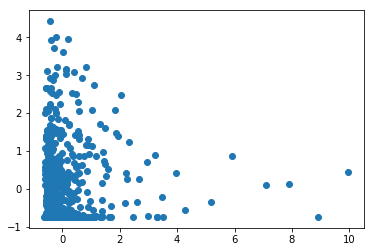

In [837]:
plt.scatter(active_list_pending_ratio_transform[:,0], active_list_pending_ratio_transform[:,1])

**active_list_pending_ratio_transform[:,0] - is the scaled training data**

####  Compare the coefficients in your linear regression between the standardized and the unstandardized versions. What is the difference? How do you interpret the coefficients in each case?

In [843]:
'''Calculating the Model Score and Coefficient for the standardized version'''
lr2 = LinearRegression()
model2 = lr.fit(active_list_pending_ratio_transform, y_train)
model2_score = model2.score(active_list_pending_ratio_transform, y_train)
print ('Model Score with Standard Scalar (Training Set): \n', model2_score)
print ('Model Coeff with Standard Scalar (Training Set): \n', model2.coef_)

Model Score with Standard Scalar (Training Set): 
 0.121330497632
Model Coeff with Standard Scalar (Training Set): 
 [[ 44144.45523581  30631.25077479]]


In [844]:
'''Calculating the Model Score and Coefficient for the unstandardized version'''
lr3 = LinearRegression()
model3_score = model2.score(active_list_pending_ratio, y_train)
print ('Model Score with Unstandardized (Training Set): \n', model3_score)
print ('Model Coeff with Unstandardized (Training Set): \n', model3.coef_)

Model Score with Unstandardized (Training Set): 
 -417223.911071
Model Coeff with Unstandardized (Training Set): 
 [[  3.20402971e+01   1.36477134e+05]]


#### Standardize your test data and look at the  R2  score between the standardized and unstandardized versions of your model. Is there a difference? Why or why not?

In [845]:
'''Standardizing the Test Set with the Standard Scalar'''
active_list_pending_ratio_test = x_test[['Active Listing Count ', 'Pending Ratio']].values

'''Performing the fit and the transform method'''
ss_scaler.fit(active_list_pending_ratio_test)
active_list_pending_ratio_test_transform = ss_scaler.transform(active_list_pending_ratio_test)
active_list_pending_ratio_transform[0:5,:]

array([[-0.00807521, -0.75069622],
       [-0.43534843, -0.7581092 ],
       [-0.49155489, -0.17248438],
       [-0.15067309,  0.04388175],
       [ 1.1233401 , -0.75671926]])

In [846]:
'''Calculating the Model Score and Coefficient for the standardized version (Test)'''

lr4 = LinearRegression()
model4 = lr.fit(active_list_pending_ratio_test_transform, y_test)
model4_score = model4.score(active_list_pending_ratio_test_transform, y_test)
print ('Model Score with Standard Scalar (Training Set): \n', model4_score)
print ('Model Coeff with Standard Scalar (Training Set): \n', model4.coef_)

Model Score with Standard Scalar (Training Set): 
 0.0838852356742
Model Coeff with Standard Scalar (Training Set): 
 [[ 25376.79012794  38339.01230232]]


In [847]:
'''Calculating the Model Score and Coefficient for the unstandardized version (Test)'''

lr4 = LinearRegression()
model5 = lr.fit(active_list_pending_ratio_test, y_test)
model5_score = model4.score(active_list_pending_ratio_test, y_test)
print ('Model Score with Standard Scalar (Training Set): \n', model5_score)
print ('Model Coeff with Standard Scalar (Training Set): \n', model5.coef_)

Model Score with Standard Scalar (Training Set): 
 0.0838852356742
Model Coeff with Standard Scalar (Training Set): 
 [[  1.27067315e+01   1.72964987e+05]]


# Bonus: Question 8

This question is open-ended!

1. Use the remaining columns in the data. Use different features and transformations to create a model with the highest $R^2$ **in the training set** that you can. Compare the differences in feature extraction, etc. using cross-validation (`cross_val_score` or `KFolds`). Do not worry about using the preprocessing library at this point.
2. Apply these same transformations to the test dataset. How does the model score now?
3. Once you are satisfied with your model, refactor your code where appropriate to use sklearn preprocessing libraries. 